## This notebook is a trial space for performing EDA, testing code, and experimenting with model training before creating pipelines and modular components for the project.


In [1]:
## IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
## IMPORTING THE DATASET
df = pd.read_csv('data\Telco_customer_churn.csv')

In [3]:
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.drop(columns=["customerID"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
# printing unique values in each column
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")
        print('-'*50)

gender: ['Female' 'Male']
--------------------------------------------------
Partner: ['Yes' 'No']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
PhoneService: ['No' 'Yes']
--------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV: ['No' 'Yes' 'No internet service']
--------------------------------------------------

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('Float64')


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 16 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
# checking class distribution of the target variable
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Analysis on Numerical Columns

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.0
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.8
25%,0.000000,9.000000,35.500000,401.45
50%,0.000000,29.000000,70.350000,1397.475
75%,0.000000,55.000000,89.850000,3794.7375
max,1.000000,72.000000,118.750000,8684.8


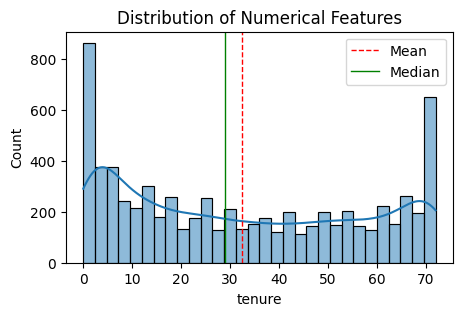

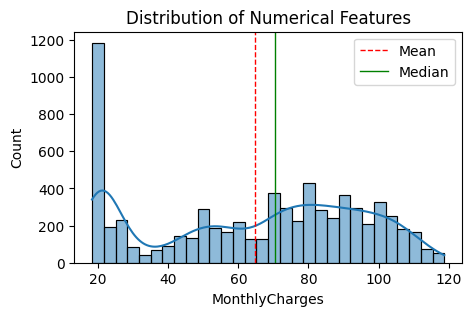

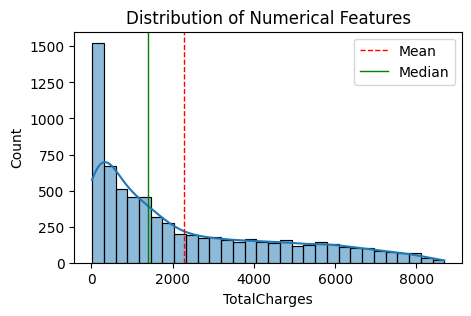

In [14]:
## Numerical features distribution across all numerical features in the dataset

def plot_histogram(df, features):
    plt.figure(figsize=(5,3))
    sns.histplot(df[features], kde=True, bins=30)
    plt.title('Distribution of Numerical Features')
    # calculate mean and median
    col_mean = df[features].mean()
    col_median = df[features].median()
    plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(col_median, color='green', linestyle='solid', linewidth=1, label='Median')
    plt.legend()
    plt.show()


plot_histogram(df, 'tenure')
plot_histogram(df, 'MonthlyCharges')

plot_histogram(df, 'TotalCharges') 


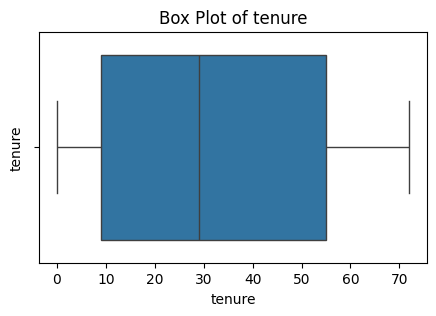

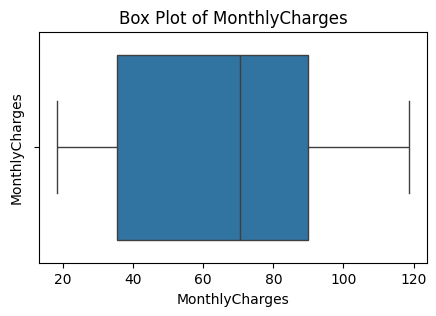

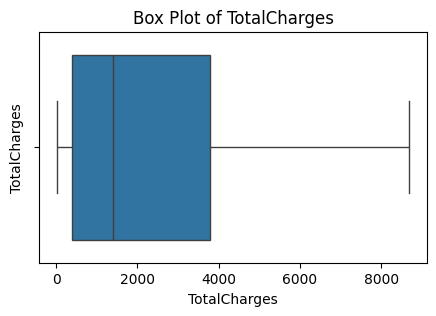

In [15]:
# BOX PLOT 

def plot_boxplot(df, features):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[features])
    plt.title(f'Box Plot of {features}')
    plt.ylabel(features)
    plt.show()

plot_boxplot(df, 'tenure')
plot_boxplot(df, 'MonthlyCharges')
plot_boxplot(df, 'TotalCharges')

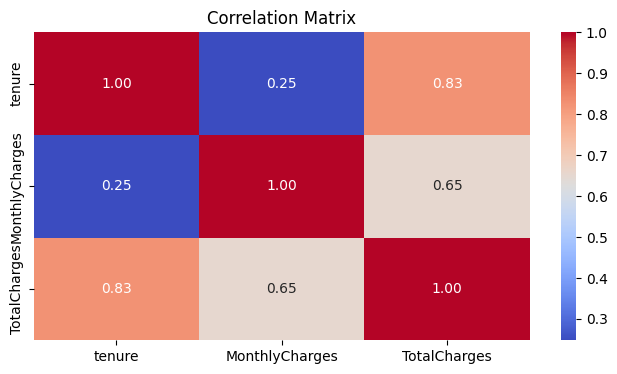

In [16]:
## Correlation Matrix 
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Analysis on Categorical Column

In [17]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


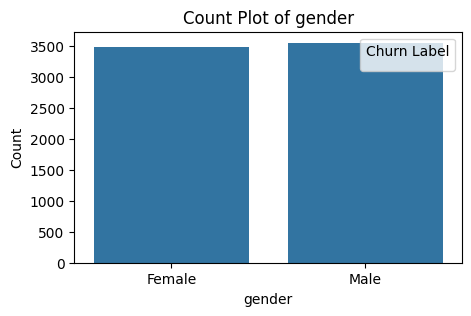

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


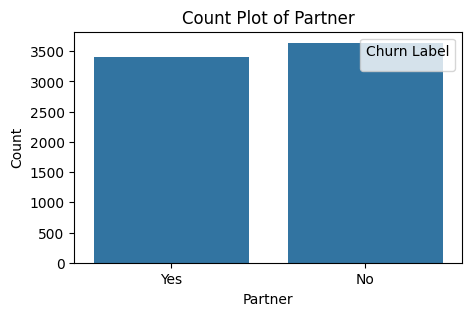

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


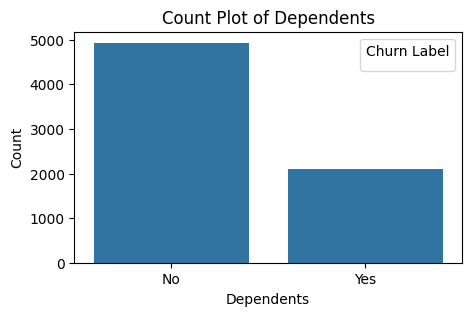

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


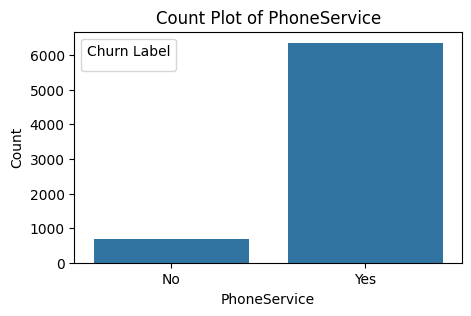

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


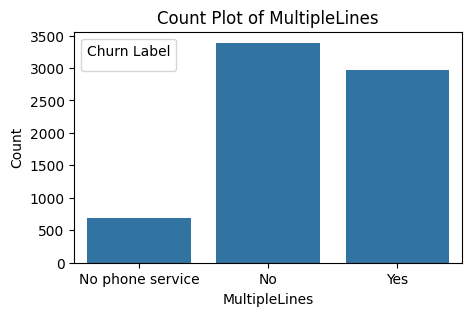

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


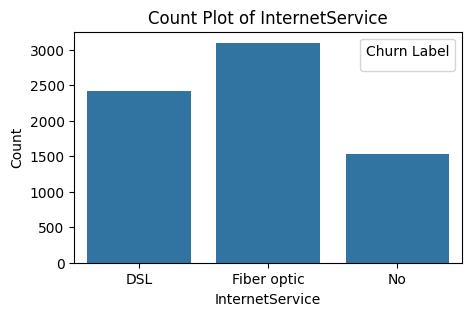

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


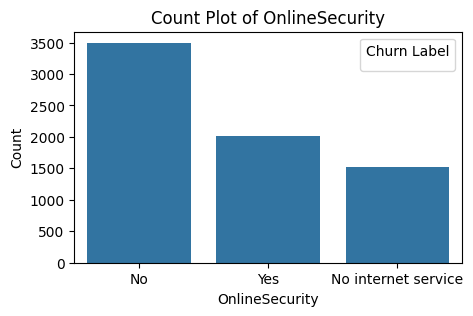

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


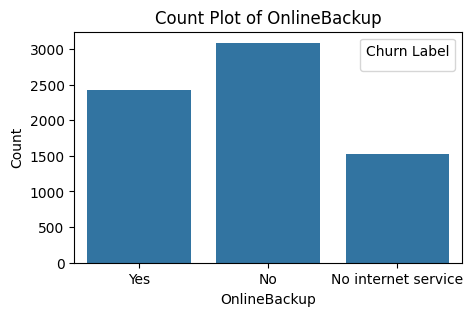

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


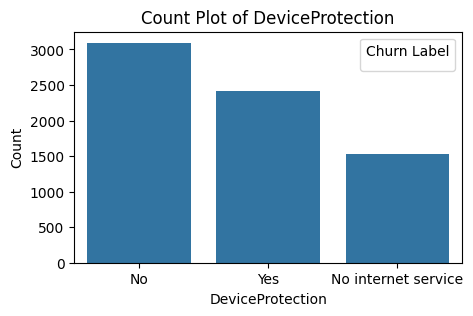

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


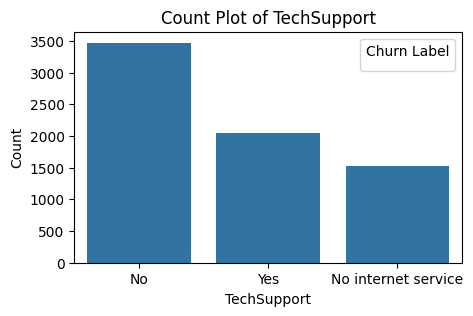

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


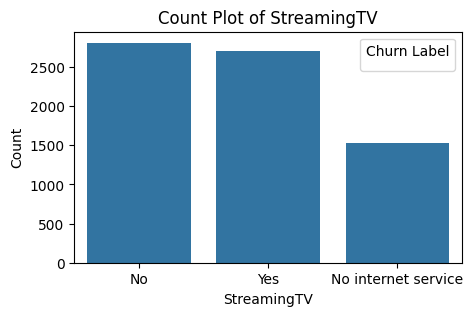

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


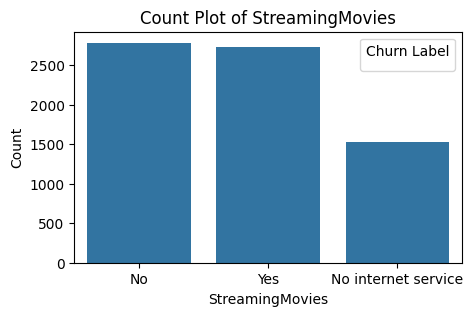

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


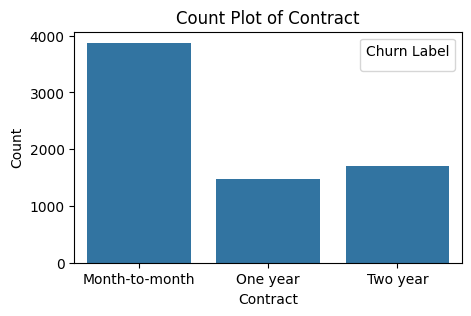

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


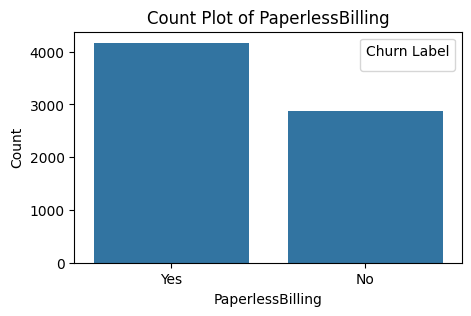

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


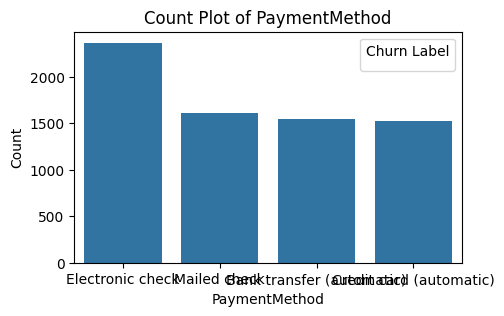

C:\Users\shree\AppData\Local\Temp\ipykernel_5896\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


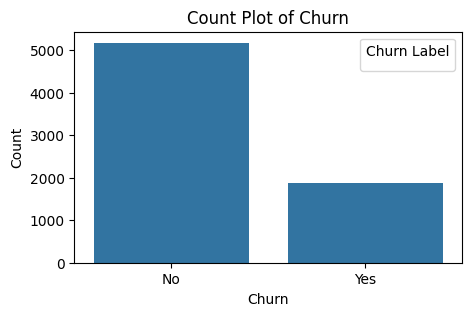

In [18]:
# Countplot for categorical features

for cat_features in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[cat_features])
    plt.title(f'Count Plot of {cat_features}')
    plt.xlabel(cat_features)
    plt.ylabel('Count')
    plt.legend(title='Churn Label')
    plt.show()

### Label Encoding of target variable

In [19]:

#df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [20]:
df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [21]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### ordinal Encoding of categorical column

In [22]:
# identifying the categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Categorical Features:', categorical_features)

Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:

encoder = {}

for col in categorical_features:
    ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df[[col]] = ord_enc.fit_transform(df[[col]])   # pass as 2D array
    encoder[col] = ord_enc   # store encoder for each column

# Save encoders dictionary
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [24]:
encoder

{'gender': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'Partner': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'Dependents': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'PhoneService': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'MultipleLines': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'InternetService': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'OnlineSecurity': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'OnlineBackup': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'DeviceProtection': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'TechSupport': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'StreamingTV': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
 'StreamingMovies': OrdinalEncoder(handle_unknow

In [25]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.5,0.0
